# Polynomial Regression

## Importing the libraries

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Import the dataset

In [20]:
dataset = pd.read_csv("Position_Salaries.csv")
X = dataset.iloc[:, 1:-1].values
Y = dataset.iloc[:, -1].values
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

### Skipping the split for now

## Training a simple linear regression model

In [21]:
from sklearn.linear_model import LinearRegression
lin_regressor = LinearRegression()
lin_regressor.fit(X, Y)

LinearRegression()

## Training the polynomial regression model

In [22]:
from sklearn.preprocessing import PolynomialFeatures
poly_feat = PolynomialFeatures(degree=3)
# Transform current matrix of features to a matrix of features for polynomial regression
X_poly = poly_feat.fit_transform(X)
X_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [23]:
# Training the model
poly_regressor = LinearRegression()
poly_regressor.fit(X_poly, Y)

LinearRegression()

## Visualising the linear regression model on the whole dataset

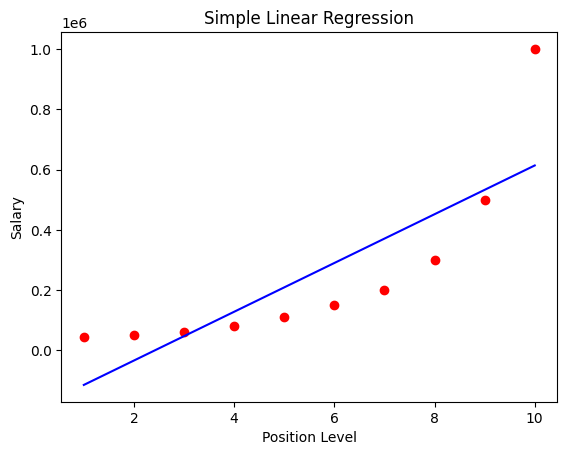

In [24]:
plt.scatter(X, Y, color='red')
plt.plot(X, lin_regressor.predict(X), color='blue')
plt.title('Simple Linear Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the polynomial regression model on the whole dataset

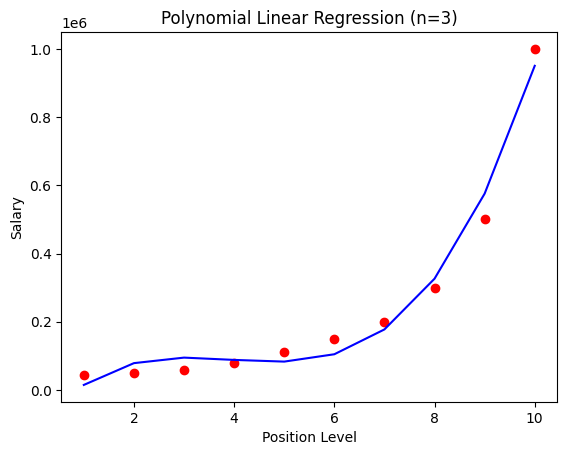

In [25]:
plt.scatter(X, Y, color='red')
plt.plot(X, poly_regressor.predict(X_poly), color='blue')
plt.title('Polynomial Linear Regression (n=3)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

### Better resolution (smoother curve)

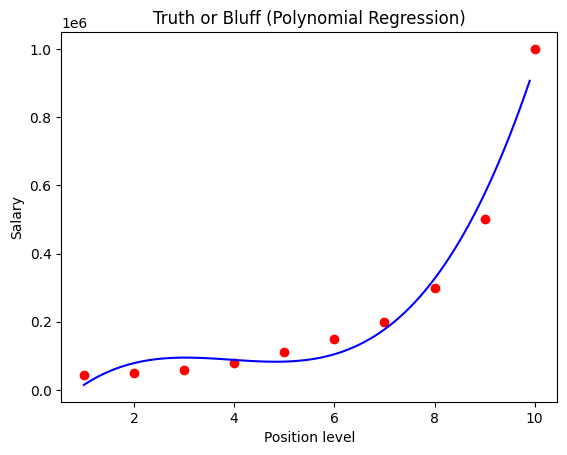

In [27]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, Y, color = 'red')
plt.plot(X_grid, poly_regressor.predict(poly_feat.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result using linear regression

In [28]:
lin_regressor.predict([[6.5]])

array([330378.78787879])

## Predicting a new result using polynomial regression

In [31]:
# poly_regressor.predict([[1, 6.5, 6.5**2, 6.5**3]])
poly_regressor.predict(poly_feat.fit_transform([[6.5]]))

array([133259.46969697])